<a href="https://colab.research.google.com/github/yunnsss/Fog_Forecast/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, accuracy_score
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/날씨마루 공모전/FE/train_FE.csv')
test = pd.read_csv('/content/drive/MyDrive/날씨마루 공모전/FE/test_FE.csv')

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
# 필요없는 열 제거
train = train.drop(labels=['sin_week', 'cos_week',
                                'sin_year', 'cos_year'
                                ], axis = 1)

test = test.drop(labels=['sin_week', 'cos_week',
                                'sin_year', 'cos_year'
                                ], axis = 1)

In [ ]:
#train
# stn_id의 첫 번째 글자 추출
train['group'] = train['stn_id'].str[0]

# 각 글자별로 데이터프레임 분리
stn_A=train[train['group'] == 'A']
stn_B=train[train['group'] == 'B']
stn_C=train[train['group'] == 'C']
stn_D=train[train['group'] == 'D']
stn_E=train[train['group'] == 'E']


#train
# stn_id의 첫 번째 글자 추출
test['group'] = test['stn_id'].str[0]

# 각 글자별로 데이터프레임 분리
test_stn_A=test[test['group'] == 'A']
test_stn_B=test[test['group'] == 'B']
test_stn_C=test[test['group'] == 'C']
test_stn_D=test[test['group'] == 'D']
test_stn_E=test[test['group'] == 'E']

#################################################################################

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score
from imblearn.over_sampling import SMOTE

# rf 모델 생성 함수
def get_rf_model(stn_data, stn_name):
    X = stn_data.drop(labels=['year','month','day','time','minute', 'season', 'stn_id', 'group', 'datetime', 'vis1','class'], axis=1)
    y = stn_data['class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    # SMOTE oversampling
    print("SMOTE 과샘플링 진행 중...")
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # 모델 학습 및 평가
    model = RandomForestClassifier(n_estimators=100, max_features='sqrt', criterion='gini', random_state=42,class_weight= 'balanced' )
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='weighted')
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{stn_name} rf 모델의 MAE: {mae}")
    print(f"{stn_name} rf 모델의 정확도: {accuracy}")
    print(f"{stn_name} rf 모델의 F1 점수: {f1}")

    return model, f1, mae

# 각 데이터프레임에 대한 rf 모델 학습 및 평가
# stn_A, stn_B, stn_C, stn_D, stn_E 데이터프레임이 이미 정의되어 있다고 가정
rf_stn_A, f1_stn_A, mae_stn_A = get_rf_model(stn_A, '_A_')
rf_stn_B, f1_stn_B, mae_stn_B = get_rf_model(stn_B, '_B_')
rf_stn_C, f1_stn_C, mae_stn_C = get_rf_model(stn_C, '_C_')
rf_stn_D, f1_stn_D, mae_stn_D = get_rf_model(stn_D, '_D_')
rf_stn_E, f1_stn_E, mae_stn_E = get_rf_model(stn_E, '_E_')

SMOTE 과샘플링 진행 중...
_A_ rf 모델의 MAE: 0.007496581558809183
_A_ rf 모델의 정확도: 0.994126678234725
_A_ rf 모델의 F1 점수: 0.994266382606979
SMOTE 과샘플링 진행 중...
_B_ rf 모델의 MAE: 0.03198172018184279
_B_ rf 모델의 정확도: 0.9778110395452337
_B_ rf 모델의 F1 점수: 0.9793981606057567
SMOTE 과샘플링 진행 중...
_C_ rf 모델의 MAE: 0.008354378107082162
_C_ rf 모델의 정확도: 0.9943298232239005
_C_ rf 모델의 F1 점수: 0.9944646190320632
SMOTE 과샘플링 진행 중...
_D_ rf 모델의 MAE: 0.01783054598068003
_D_ rf 모델의 정확도: 0.9879462955870463
_D_ rf 모델의 F1 점수: 0.988417040938121
SMOTE 과샘플링 진행 중...
_E_ rf 모델의 MAE: 0.006651295727658128
_E_ rf 모델의 정확도: 0.9949743404485906
_E_ rf 모델의 F1 점수: 0.995151493422623


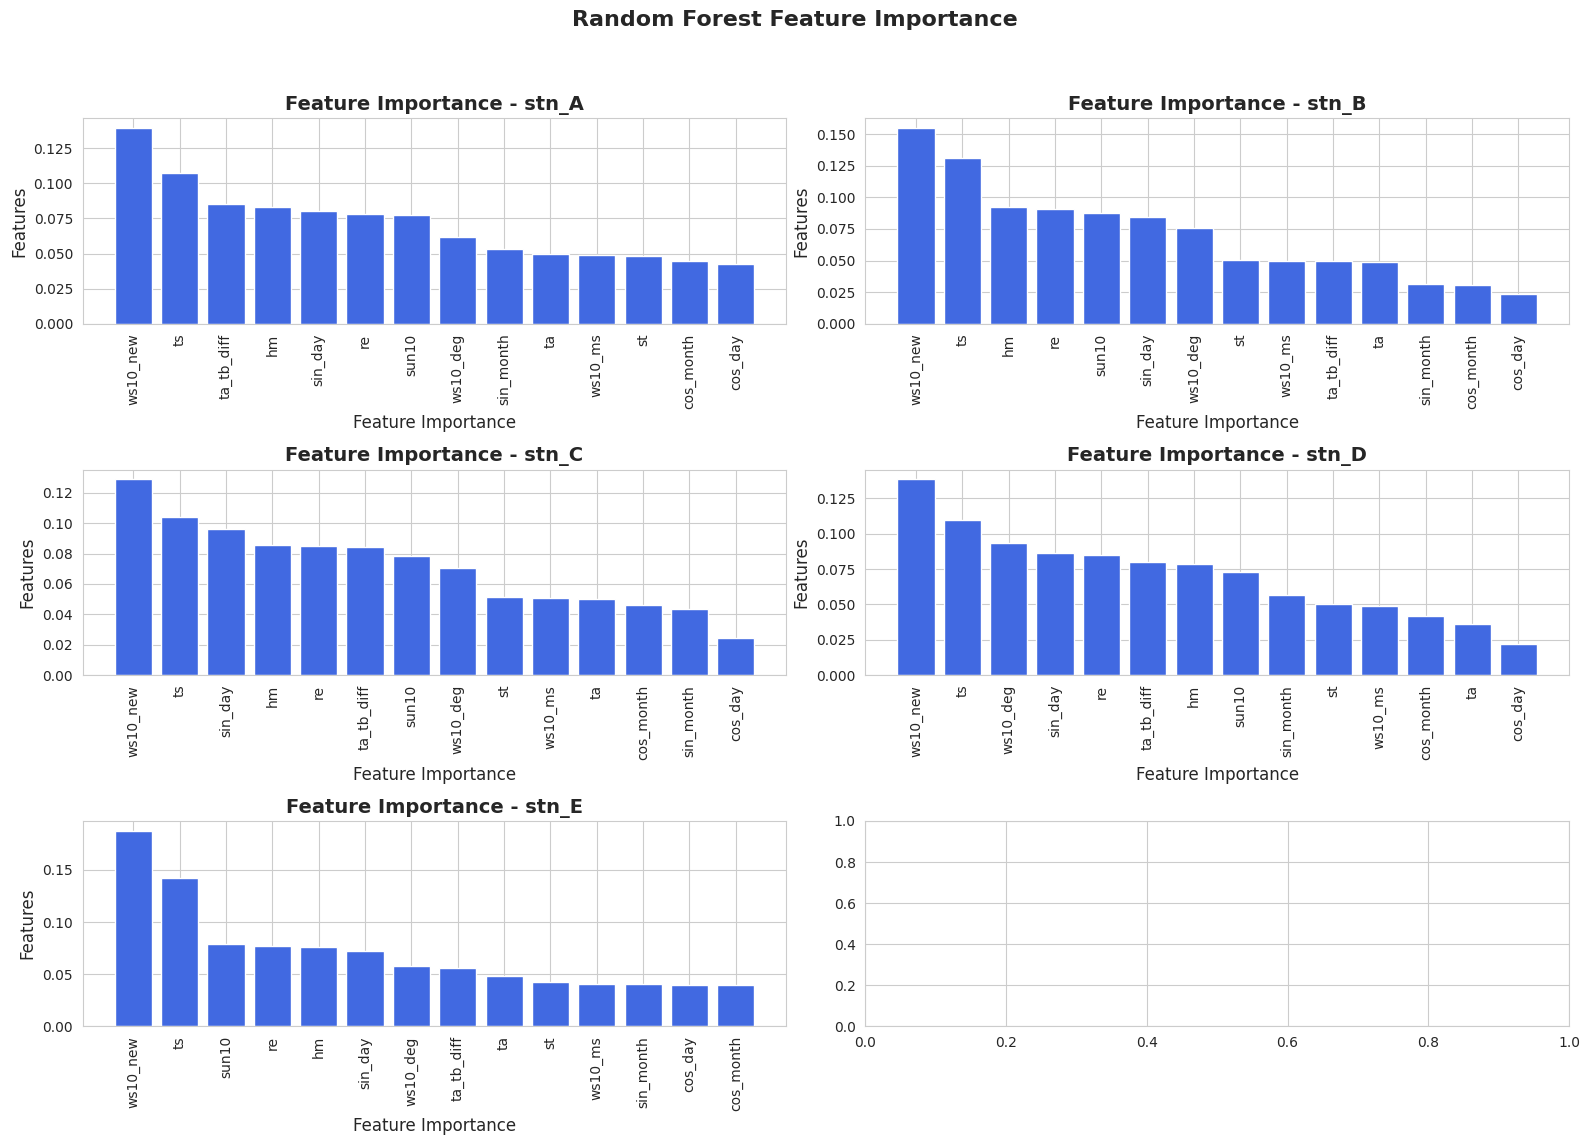

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# 그래프 스타일 변경
sns.set_style("whitegrid")

# 각 모델의 feature importance 확인
models = [rf_stn_A, rf_stn_B, rf_stn_C, rf_stn_D, rf_stn_E]
feature_names = ['ws10_deg', 'ws10_ms', 'sin_day', 'cos_day', 'ts', 'ta', 're', 'hm', 'sun10', 'ws10_new','sin_month','cos_month','ta_tb_diff','st']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

model_labels = ['stn_A', 'stn_B', 'stn_C', 'stn_D', 'stn_E']

for i, model in enumerate(models):
    # RandomForest의 feature_importances_를 사용하여 feature importance 확인
    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()[::-1]

    axes[i].bar(range(len(sorted_idx)), feature_importances[sorted_idx], color='#4169E1')
    axes[i].set_title(f'Feature Importance - {model_labels[i]}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Feature Importance', fontsize=12)
    axes[i].set_ylabel('Features', fontsize=12)
    axes[i].set_xticks(range(len(sorted_idx)))
    axes[i].set_xticklabels([feature_names[idx] for idx in sorted_idx], rotation=90)

plt.suptitle('Random Forest Feature Importance', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 상단 여백 조정
plt.show()



In [ ]:
# 결과 데이터 생성
results = {
    'Station': ['A', 'B', 'C', 'D', 'E'],
    'MAE': [mae_stn_A, mae_stn_B, mae_stn_C, mae_stn_D, mae_stn_E],
    'Accuracy': [f1_stn_A, f1_stn_B, f1_stn_C, f1_stn_D, f1_stn_E],
    'F1-score': [f1_stn_A, f1_stn_B, f1_stn_C, f1_stn_D, f1_stn_E]
}

result_df = pd.DataFrame(results)

# 데이터프레임 출력
print(result_df)

  Station       MAE  Accuracy  F1-score
0       A  0.007497  0.994266  0.994266
1       B  0.031982  0.979398  0.979398
2       C  0.008354  0.994465  0.994465
3       D  0.017831  0.988417  0.988417
4       E  0.006651  0.995151  0.995151


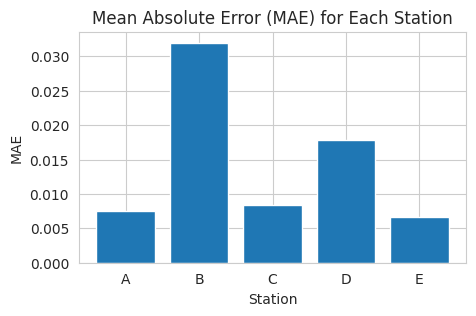

In [ ]:
# MAE 시각화
plt.figure(figsize=(5, 3))
stations = ['A', 'B', 'C', 'D', 'E']
mae_values = [mae_stn_A, mae_stn_B, mae_stn_C, mae_stn_D, mae_stn_E]

plt.bar(stations, mae_values)
plt.xlabel('Station')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for Each Station')
plt.show()

In [ ]:
# 예측 함수
def predict_and_fill(stn_test, model):
    X = stn_test.drop(labels=['year','month','day','time','minute', 'season', 'stn_id', 'group', 'datetime', 'class'], axis=1)
    y_pred = model.predict(X)

    # Assigning predicted classes back to season_df
    stn_test['class'] = y_pred

    return stn_test

pred_stn_A = predict_and_fill(test_stn_A, rf_stn_A)
pred_stn_B = predict_and_fill(test_stn_B, rf_stn_B)
pred_stn_C = predict_and_fill(test_stn_C, rf_stn_C)
pred_stn_D = predict_and_fill(test_stn_D, rf_stn_D)
pred_stn_E = predict_and_fill(test_stn_E, rf_stn_E)


<ipython-input-66-564d3e2cb7f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn_test['class'] = y_pred
<ipython-input-66-564d3e2cb7f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn_test['class'] = y_pred
<ipython-input-66-564d3e2cb7f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [ ]:
# 데이터프레임 합치기
result_stn = pd.concat([pred_stn_A, pred_stn_B, pred_stn_C, pred_stn_D, pred_stn_E])

In [ ]:
result_stn['class'].value_counts()

class
4    257491
3      2413
2      2160
1       736
Name: count, dtype: int64

In [ ]:
# result 데이터프레임을 CSV 파일로 저장
result_stn.to_csv('/content/drive/MyDrive/날씨마루 공모전/Final//Random_Forest.csv', index=True)

###########################################################################